### Importando Bibliotecas

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

In [96]:
# Importando os dados

dados = pd.read_csv('Consumo_cerveja.csv', sep = ';')
dados.head(5)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


## Visualizando a Correlação

In [97]:
# As melhores correlações em relação ao preço são: temp_max, fds, chuva, temp_media

dados.corr().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


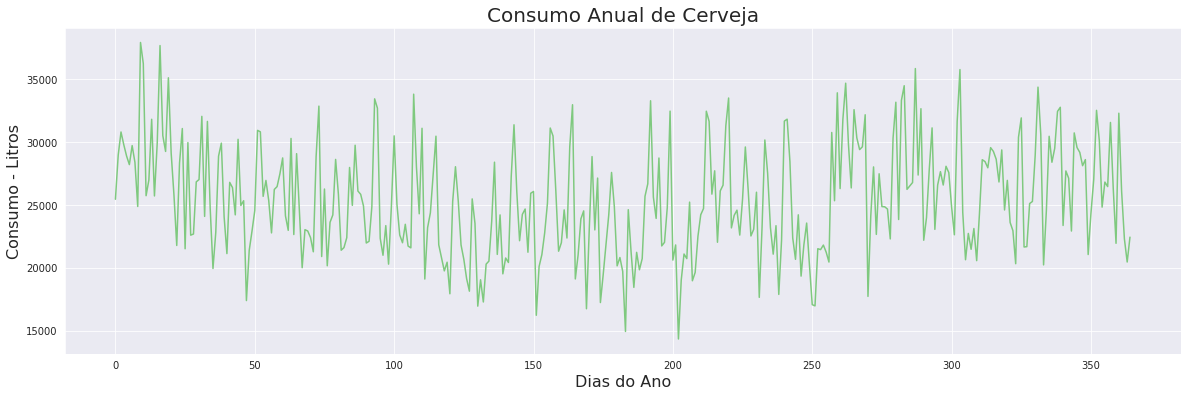

In [98]:
# Comportamento da variável dependente (Y) durante o ano:

ax = dados.consumo.plot()
ax.figure.set_size_inches(20, 6)
ax.set_title('Consumo Anual de Cerveja', fontsize = 20)
ax.set_xlabel('Dias do Ano', fontsize = 16)
ax.set_ylabel('Consumo - Litros', fontsize = 16);

### Visualizando a Distribuição dos dados

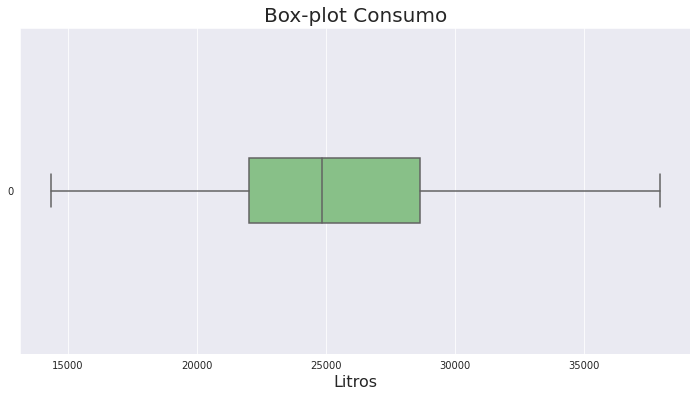

In [99]:
# Aparentemente, os dados apresentam uma distribuição simétrica

ax = sns.boxplot(data = dados.consumo, orient = 'h', width = 0.2)
ax.set_title('Box-plot Consumo', fontsize = 20)
ax.set_xlabel('Litros', fontsize = 16)
ax.figure.set_size_inches(12, 6)

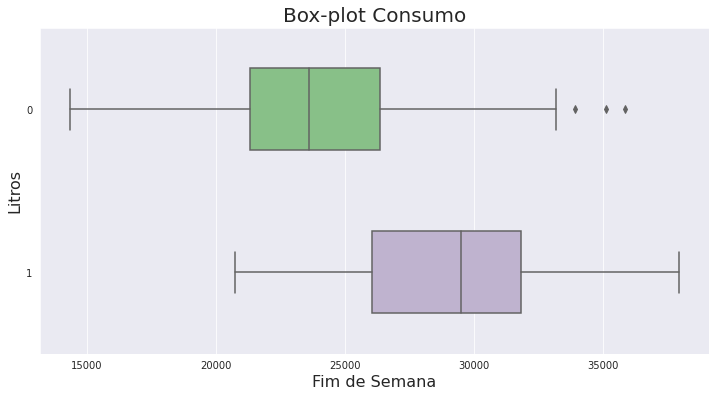

In [100]:
# Box-PLot do consumo em sendo fim de semana ou não
ax = sns.boxplot(y = 'fds', x = 'consumo', data = dados, orient = 'h', width = 0.5)
ax.set_title('Box-plot Consumo', fontsize = 20)
ax.set_xlabel('Fim de Semana', fontsize = 16)
ax.set_ylabel('Litros', fontsize = 16)
ax.figure.set_size_inches(12, 6)
ax

# Mudando estilo e PAleta de cores:
sns.set_palette("Accent")
sns.set_style("darkgrid")

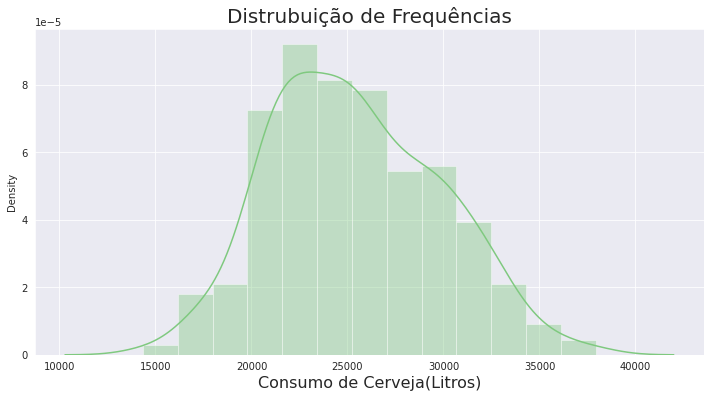

In [101]:
# Distribuição de frequências da variável dependente (y)
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_xlabel('Consumo de Cerveja(Litros)', fontsize=16)
ax

### Gráfico de Dispersão entre as Variáveis

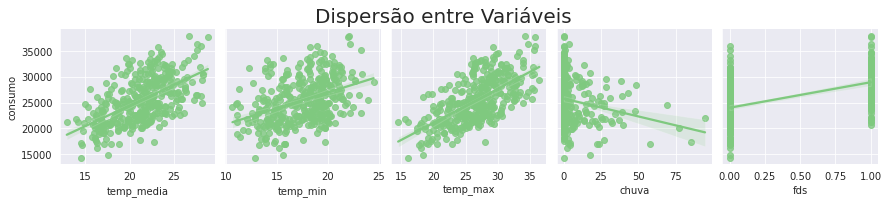

In [93]:
ax = sns.pairplot(data = dados, y_vars = 'consumo', x_vars = ['temp_media', 'temp_min', 'temp_max', 'chuva', 'fds'], kind = 'reg')
ax.fig.suptitle('Dispersão entre Variáveis', fontsize = 20, y = 1.09);

### Estimando um Modelo de Regressão Linear para o Consumo

In [94]:
from sklearn.model_selection import train_test_split

In [102]:
y = dados.consumo
X = dados[['temp_max', 'chuva', 'fds']]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [104]:
#Criando nosso modelo

from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [105]:
# Treinando modelo

modelo.fit(X_train, y_train)

LinearRegression()

In [106]:
# Calculando R²:

y_test_previsto = modelo.predict(X_test)
from sklearn import metrics
print('R² = {}'.format(metrics.r2_score(y_test, y_test_previsto).round(2)))
# Nos obtivemos um bom Coeficiente de Determinação

R² = 0.69


In [107]:
# Obtendo o intercepto do modelo

intercepto = modelo.intercept_.round(2)

# Obtendo os coeficientes de regressão

coefs_reg = modelo.coef_.round(2)

In [108]:
# Criando DF com o Parametros

index = ['Intercepto', 'Temperatura Máxima', 'Chuva', 'Fim de Semana']
pd.DataFrame(data = np.append(intercepto, coefs_reg), index = index, columns =['Consumo Médio'])

,Consumo Médio
Intercepto,6008.30
Temperatura Máxima,687.79
Chuva,-66.46
Fim de Semana,5161.52


In [109]:
print('Independente das outras variáveis o efeito médio no Consumo de Cerveja seria de {} litros'.format(modelo.intercept_.round(2)))
print('Mantendo as variáveis (temp_max) e (fds), o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de {} litros'.format(modelo.coef_[1].round(2)))
print('Mantendo as variáveis (chuva) e (temp_max),o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de {} litros'.format(modelo.coef_[2].round(2)))
print('Mantendo as variáveis (chuva) e (fds),o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de {} litros'.format(modelo.coef_[0].round(2)))

Independente das outras variáveis o efeito médio no Consumo de Cerveja seria de 6008.3 litros
Mantendo as variáveis (temp_max) e (fds), o acréscimo de 1mm de Chuva gera uma variação média no Consumo de Cerveja de -66.46 litros
Mantendo as variáveis (chuva) e (temp_max),o fato de o dia ser classificado como Final de Semana gera uma variação média no Consumo de Cerveja de 5161.52 litros
Mantendo as variáveis (chuva) e (fds),o acréscimo de 1°C na Temperatura Máxima gera uma variação média no Consumo de Cerveja de 687.79 litros


É possível perceber que para valores maiores, a previsão não funciona tão bem


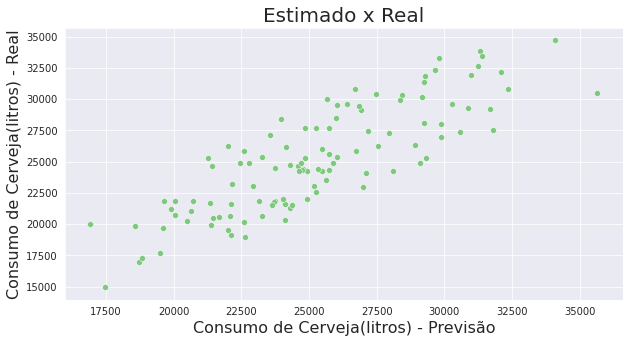

In [110]:
# Relação de Dispersão entre consumo real e previsto

ax = sns.scatterplot(x = y_test_previsto, y = y_test)
ax.figure.set_size_inches(10, 5)
ax.set_xlabel('Consumo de Cerveja(litros) - Previsão', fontsize= 16)
ax.set_ylabel('Consumo de Cerveja(litros) - Real', fontsize= 16)
ax.set_title('Estimado x Real', fontsize= 20);
print('É possível perceber que para valores maiores, a previsão não funciona tão bem')


### Calcular o Resíduo ou (Erro na Regressão Linear)

Text(0.5, 1.0, 'Resíduo x Previsão')

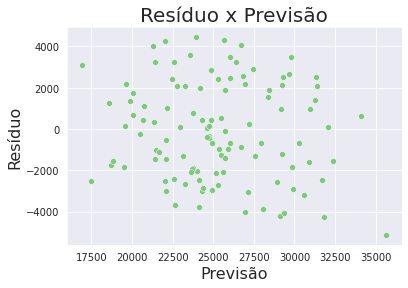

In [111]:
# O resíduo é a disância entre a reta de regressão e os pontos
# É importante observarmos que a variância dos resíduos deve ser constante (O que não está acontecendo)
# O CERTO é que a disperssão fique dentro de um intervalo fechado (O que não está acontecendo)

residuo = y_test - y_test_previsto

ax = sns.scatterplot(x = y_test_previsto, y = residuo)
ax.set_xlabel('Previsão', fontsize = 16)
ax.set_ylabel('Resíduo', fontsize = 16)
ax.set_title('Resíduo x Previsão', fontsize =20)

Text(0.5, 1.0, 'Resíduo x Previsão')

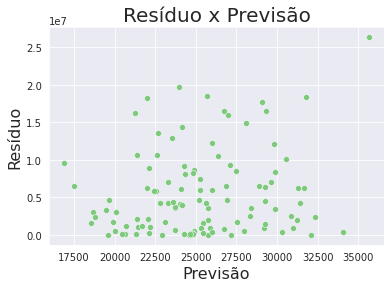

In [112]:
# Elevaremos o resíduo ao quadrado, para verificar se de fato há uma varição constante
# Como estamos lidando com um conjunto de dados pequeno, esse problema geralmente ocorre
# Nitidamente é possível visualizar que a variância dos resíduos não é constante

ax = sns.scatterplot(x = y_test_previsto, y = residuo**2)
ax.set_xlabel('Previsão', fontsize = 16)
ax.set_ylabel('Resíduo', fontsize = 16)
ax.set_title('Resíduo x Previsão', fontsize =20)

## Comparando Modelos

In [113]:
# Criaremos um novo modelo, substituindo a variável 'temp_max' por 'temp_media'

y2 = dados.consumo
X2 = dados[['temp_media', 'fds', 'chuva']]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.7)

# Treinando modelo
modelo_2 = LinearRegression()
modelo_2.fit(X2_test, y2_test)

#Coef de Determinação
y_test_previsto_2 = modelo_2.predict(X2_test)
from sklearn import metrics
print('R² = {}'.format(metrics.r2_score(y2_test, y_test_previsto_2).round(2)))

R² = 0.67


###  Outras Métricas de Regressão

#### EQM (Erro Quadrático Médio)
#### REQM (Raiz do Erro Quadrático Médio)
#### R² (Coeficiente de Determinação)

In [114]:
EQM = metrics.mean_squared_error(y_test, y_test_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_test_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_test_previsto).round(2)

pd.DataFrame(data = [EQM, REQM, R2], index = ['EQM', 'REQM', 'R2'], columns = ['Métricas'])

,Métricas
EQM,5441821.07
REQM,2332.77
R2,0.69


In [115]:
# Modelo 2
EQM_2 = metrics.mean_squared_error(y2_test, y_test_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_test_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_test_previsto_2).round(2)

pd.DataFrame(data = [EQM_2, REQM_2, R2_2], index = ['EQM', 'REQM', 'R2'], columns = ['Métricas'])

,Métricas
EQM,5883861.17
REQM,2425.67
R2,0.67


In [116]:
# podemos concluir que o Modelo 1 apresenta uma performance melhor

## Salvando o modelo estimado

In [117]:
import pickle

In [118]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()